In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from matplotlib import pyplot as plt

In [2]:
X = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 18.6])

In [3]:
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [4]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # (1, 1) -> one node in input layer and one node in output layer
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

In [5]:
dataset = LinearRegressionDataset(X, y)
batchsize = dataset.__len__()
dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)

In [6]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [7]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input, target in dataloader:
        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'parameters = w = {model.linear.weight.item()}, b = {model.linear.bias.item()}, loss = {loss.item()}')
        loss = loss.detach().numpy()
        loss_list.append(loss)

parameters = w = 0.7350324988365173, b = 0.06834716349840164, loss = 39.031002044677734
parameters = w = 0.8190670609474182, b = 0.07311207056045532, loss = 5.7638397216796875
parameters = w = 0.8513245582580566, b = 0.07494915276765823, loss = 0.8618332147598267
parameters = w = 0.863706648349762, b = 0.07566234469413757, loss = 0.13951049745082855
parameters = w = 0.8684592247009277, b = 0.07594411820173264, loss = 0.033074043691158295
parameters = w = 0.8702831268310547, b = 0.07606028020381927, loss = 0.017390359193086624
parameters = w = 0.870982825756073, b = 0.07611287385225296, loss = 0.015079135075211525
parameters = w = 0.8712509870529175, b = 0.07614106684923172, loss = 0.014738425612449646
parameters = w = 0.8713534474372864, b = 0.07615988701581955, loss = 0.014688070863485336
parameters = w = 0.8713923096656799, b = 0.07617510855197906, loss = 0.014680525287985802
parameters = w = 0.8714067935943604, b = 0.07618895173072815, loss = 0.014679291285574436
parameters = w = 0.

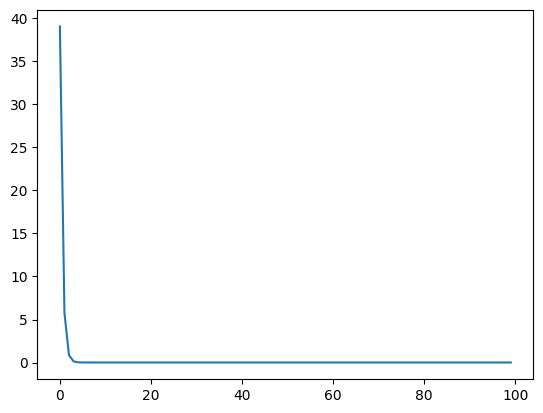

In [8]:
plt.plot(loss_list)
plt.show()